# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [212]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   8   9    10   11   12   13  14  15  \
0   111   94  48   83  162  64  10  156  43  19  153  177  357  187  74   4   
1   642   95  46  104  208  66   9  191  35  22  148  210  543  169  68   0   
2   281   82  43   73  154  65   7  151  44  19  143  178  341  160  76   5   
3   723  105  46  100  195  61   9  193  34  22  150  207  557  161  65   5   
4   447   95  57  104  228  74  10  212  31  24  175  224  670  223  74   0   
5   117  109  53  109  221  69  12  221  31  25  169  226  712  212  72  13   
6   747   80  43   68  123  53   7  150  46  19  147  169  327  176  81   7   
7   669   85  44   66  125  58   6  148  45  19  145  170  323  185  84   8   
8   299   98  40   77  171  61   6  172  37  21  139  197  457  141  72   4   
9   841   93  39   87  183  64   8  169  40  20  134  200  422  149  72   7   
10   84   89  40   76  188  76   7  150  44  19  136  174  342  148  72   3   
11  280  100  44   93  193  62   8  186  35  22  147  202  521  151  66   0   
12   64   93  45   86  201  69   7  184  35  22  145  203  523  183  72   0   
13  684   99  38   74  184  66   6  164  39  20  131  193  414  137  71   2   
14  207   85  42   64  121  55   7  149  46  19  146  167  323  172  85   1   

    16   17   18  
0   14  185  196  
1   28  190  200  
2   11  185  189  
3    9  194  202  
4    4  186  193  
5   28  188  201  
6   14  179  184  
7    1  180  183  
8   17  199  201  
9   25  188  195  
10   8  193  197  
11   2  193  198  
12   4  194  197  
13  22  200  202  
14   6  179  182

Methods `describe` and `info` deliver some useful information.

In [213]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   424.703097   93.708561   44.910747   82.202186  168.856102   61.568306   
std    245.361883    8.018611    6.214039   15.837482   33.427600    7.526921   
min      0.000000   76.000000   33.000000   40.000000  104.000000   47.000000   
25%    216.000000   88.000000   40.000000   70.000000  140.000000   57.000000   
50%    421.000000   93.000000   44.000000   80.000000  169.000000   61.000000   
75%    637.000000  100.000000   50.000000   98.000000  195.000000   65.000000   
max    844.000000  117.000000   58.000000  112.000000  333.000000  138.000000   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     8.504554  168.810565   40.950820   20.570128  148.067395  188.593807   
std      4.373785   33.140221    7.861445    2.590180   14.566141   31.223892   
min      2.000000  112.000000   26.000000   17.000000  118.000000  130.000000   
25%      7.000000  146.000000   33.000000   19.000000  137.000000  167.000000   
50%      8.000000  157.000000   43.000000   20.000000  146.000000  179.000000   
75%     10.000000  200.000000   46.000000   23.000000  159.000000  217.000000   
max     55.000000  265.000000   61.000000   29.000000  182.000000  320.000000   

                12          13          14          15          16  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    439.632058  174.958106   72.389800    6.504554   12.792350   
std     175.474236   32.470257    7.636899    4.961023    8.856142   
min     184.000000  109.000000   59.000000    0.000000    0.000000   
25%     317.000000  150.000000   67.000000    3.000000    6.000000   
50%     366.000000  174.000000   71.000000    6.000000   11.000000   
75%     598.000000  199.000000   75.000000    9.000000   19.000000   
max    1018.000000  261.000000  135.000000   22.000000   41.000000   

               17          18  
count  549.000000  549.000000  
mean   188.934426  195.628415  
std      6.131414    7.456222  
min    176.000000  181.000000  
25%    185.000000  190.000000  
50%    188.000000  197.000000  
75%    193.000000  201.000000  
max    206.000000  211.000000

In [214]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Firstly, let's see the distribution of our values

In [191]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

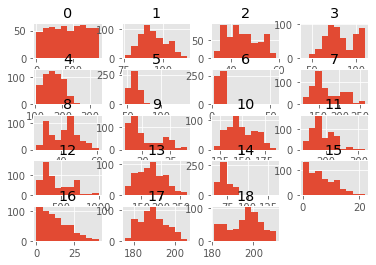

In [192]:
X_train_pd.hist()
plt.show()

It seems like, it will be god MinMaxScaler because of  the range of the variables

And will try StanderScaler

Alse we need pipeline to avoid data leak

In [215]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normalizer = MinMaxScaler()
standatizer = StandardScaler() 

Later will use the pipeline with our classifier

In [216]:
X_train_std = StandardScaler().fit_transform(X_train)
X_train_norm = MinMaxScaler().fit_transform(X_train)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [217]:
### YOUR CODE HERE
# importing libraries

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc

In [218]:
def evaluation(pipeline, X, y):
    y_predict = pipeline.predict(X)
    return{
        'accuracy': accuracy_score(y, y_predict),
        'f1': f1_score(y, y_predict, average='micro')
    }

In [219]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [220]:
model = make_pipeline(
    StandardScaler(),
    log_reg,
)

Let's checkout the model without optimal hyperparameters

In [221]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    solver='saga', tol=0.001))])

Let's use cross_val_score and GridSearchCV to optimize hyperparams

In [222]:
evaluation(model, X_test, y_test)

{'accuracy': 0.7845117845117845, 'f1': 0.7845117845117845}

In [223]:
from sklearn.model_selection import (cross_val_score, GridSearchCV) 

In [224]:
print(f'Cross validation accurasy base model: {cross_val_score(model, X_train, y_train).mean()}')

Cross validation accurasy base model: 0.7723603002502084


In [225]:
model.steps

[('standardscaler', StandardScaler()),
 ('logisticregression',
  LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                     tol=0.001))]

In [231]:
param_distr = {
    'logisticregression__penalty': ['l2', 'l1', 'elasticnet'],
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__C': np.linspace(0.1, 1, 10).tolist() + np.linspace(1, 20, 30).tolist(),
}

clf = GridSearchCV(model, param_distr, cv=5)

In [232]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'logisticregression__C': [0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                                   0.5, 0.6, 0.7000000000000001,
                                                   0.8, 0.9, 1.0, 1.0,
                                                   1.6551724137931034,
                                                   2.310344827586207,
                                                   2.96551724137...
                                    

In [233]:
print(clf.best_params_)
print(clf.best_estimator_)
best_lg = clf.best_estimator_
print(clf.best_score_)

{'logisticregression__C': 1.6551724137931034, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.6551724137931034,
                                    class_weight='balanced', max_iter=500,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga', tol=0.001))])
0.7851042535446205


In [234]:
best_lg

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.6551724137931034,
                                    class_weight='balanced', max_iter=500,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga', tol=0.001))])

Estimate the model quality with f1 and accuracy scores.

In [331]:
evaluation(clf, X_test, y_test)

ValueError: X has 19 features per sample; expecting 5

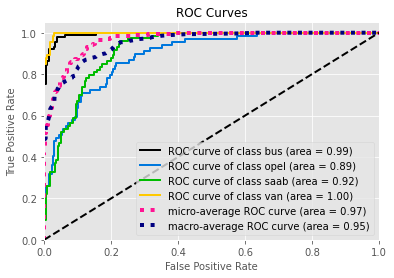

In [236]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [237]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

In [238]:
pca = PCA()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
pca.fit(X_train_std)


exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Another way of plotting

In [239]:
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_sum_eigenvalues ,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Take 5 components to save 90 per cent of variance

Firsly, let's see plot with 2 components

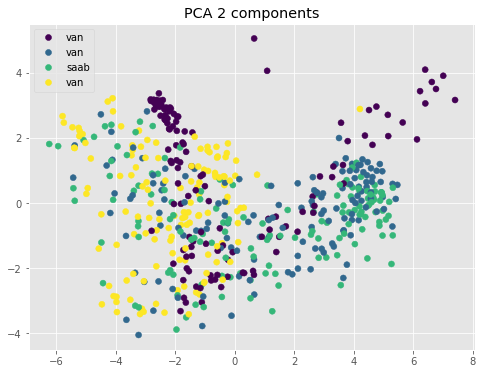

In [240]:
from sklearn.preprocessing import LabelEncoder

model_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
)

enc = LabelEncoder()
y_train_enc = enc.fit_transform(y_train)

pca = PCA()

plt.figure(figsize=(8,6))
Xt = model_pca.fit_transform(X_train)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_train_enc)
plt.legend(handles=plot.legend_elements()[0], labels=list(target))
plt.title("PCA 2 components")
plt.show()

In [241]:
### YOUR CODE HERE
std = StandardScaler()
pca_5 = PCA(5)
model_pca_5 = make_pipeline(
    std,
    pca_5,
)
X_train_pca_5 = model_pca_5.fit_transform(X_train)

X_test_pca_5 = model_pca_5.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [242]:
### YOUR CODE HERE
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

param_distr = {
    'max_iter': list(range(100, 1100, 100)),
    'class_weight': ['balanced', None],
}

clf = GridSearchCV(log_reg, param_distr, cv=5)

In [243]:
clf.fit(X_train_pca_5, y_train)
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.best_score_)

{'class_weight': None, 'max_iter': 100}
LogisticRegression(multi_class='multinomial', solver='saga', tol=0.001)
0.4573477898248541


In [244]:
evaluation(clf, X_test_pca_5, y_test)

{'accuracy': 0.4107744107744108, 'f1': 0.4107744107744108}

In [245]:
plot_roc(y_test, clf.predict_proba(X_test_pca_5))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
# YOUR CODE HERE
dtc = DecisionTreeClassifier()

param_dict = {
    'max_depth': list(range(300, 500)),
    'criterion': ['gini', 'entropy']
}

dtc_cv = GridSearchCV(dtc, param_dict, cv=5)

In [248]:
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 301, 302, 303, 304, 305, 306, 307,
                                       308, 309, 310, 311, 312, 313, 314, 315,
                                       316, 317, 318, 319, 320, 321, 322, 323,
                                       324, 325, 326, 327, 328, 329, ...]})

In [249]:
print(dtc_cv.best_params_)
print(dtc_cv.best_estimator_)
best_dt = dtc_cv.best_estimator_
print(dtc_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 356}
DecisionTreeClassifier(criterion='entropy', max_depth=356)
0.7230025020850709


In [250]:
evaluation(dtc_cv, X_train, y_train)

{'accuracy': 1.0, 'f1': 1.0}

In [251]:
evaluation(dtc_cv, X_test, y_test)

{'accuracy': 0.7104377104377104, 'f1': 0.7104377104377103}

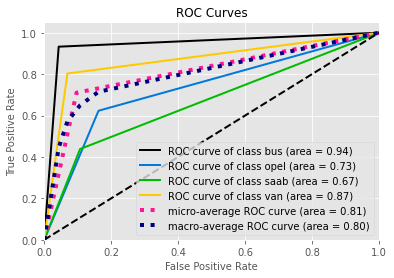

In [252]:
plot_roc(y_test, dtc_cv.predict_proba(X_test))
plt.show()

Trying to plot data with 2 PCA and the best dtc

In [253]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1),
    )

In [254]:
pca_2 = PCA(2)

enc = LabelEncoder()
std = StandardScaler()

y_train_enc = enc.fit_transform(y_train)
y_test_enc = enc.transform(y_test)

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

X_train_pca = pca_2.fit_transform(X_train_std)
X_test_pca = pca_2.transform(X_test_std)
dt = DecisionTreeClassifier(max_depth=411)

dt.fit(X_train_pca, y_train_enc)

DecisionTreeClassifier(max_depth=411)

In [255]:
predicted = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [256]:
xx, yy = get_grid(X_test_pca)

predicted = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_enc, s=100, cmap='spring', edgecolor='k')

In [352]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 8))
fig = plot_decision_regions(X=X_test_pca, y=y_test_enc, clf=dt)

Seems not quite good, but I've done it!

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [168]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.simplefilter("ignore")

In [317]:
def plot_bagging_n_estimators(base_model,
                             list: n_estimators,
                             X,
                             y):
    # init cross validation strategy
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    
    train_accuracy_result = []
    train_f1_result = []
    
    test_accuracy_result = []
    test_f1_result = []
    
    # pool through N of estimators
    for n_est in tqdm(n_estimators):
        bag_cl = BaggingClassifier(base_estimator=base_model, n_estimators=n_est)
        
        temp_train_acc = []
        temp_test_acc = []
        temp_train_f1 = []
        temp_test_f1 = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            bag_cl.fit(X_train, y_train)
            
            temp_train_acc.append(accuracy_score(y_train, bag_cl.predict(X_train)))
            temp_test_acc.append(accuracy_score(y_test, bag_cl.predict(X_test)))
            
            temp_train_f1.append(f1_score(y_train, bag_cl.predict(X_train), average='micro'))
            temp_test_f1.append(f1_score(y_test, bag_cl.predict(X_test), average='micro'))
        
        # accomulate scores for each N of estimators
        train_accuracy_result.append(temp_train_acc)
        train_f1_result.append(temp_train_f1)
        test_accuracy_result.append(temp_test_acc)
        test_f1_result.append(temp_test_f1)
        
    train_accuracy_result = np.asarray(train_accuracy_result)
    train_f1_result = np.asarray(train_f1_result)
    test_accuracy_result = np.asarray(test_accuracy_result)
    test_f1_result = np.asarray(test_f1_result)
    
    best_test_acc = [max(test_accuracy_result.mean(axis=1))*100, n_estimators[np.argmax(test_accuracy_result.mean(axis=1))]]
    best_test_f1 = [max(test_f1_result.mean(axis=1)), n_estimators[np.argmax(test_f1_result.mean(axis=1))]]
    test_mean_acc = test_accuracy_result.mean(axis=1)
    test_std_acc = test_accuracy_result.std(axis=1)
    test_mean_f1 = test_f1_result.mean(axis=1)
    test_std_f1 = test_f1_result.std(axis=1)
    
    print(f'Best accuracy on CV {best_test_acc[0]} with bagging {best_test_acc[1]} {base_model}')
    print(f'Best f1-score on CV {best_test_f1[0]} with bagging {best_test_f1[1]} {base_model}')
    
    fig = plt.figure(figsize=(10, 8))
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_1.plot(n_estimators, train_accuracy_result.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax_1.plot(n_estimators, test_accuracy_result.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax_1.fill_between(n_estimators, test_mean_acc - test_std_acc, test_mean_acc + test_std_acc, color='#888888', alpha=0.4)
    ax_1.fill_between(n_estimators, test_mean_acc - 2*test_std_acc, test_mean_acc + 2*test_std_acc, color='#888888', alpha=0.2)
    ax_1.legend(loc='best')
    ax_1.set_ylabel("Accuracy")
    ax_1.set_xlabel("N_estimators")
    
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_2.plot(n_estimators, train_f1_result.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax_2.plot(n_estimators, test_f1_result.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax_2.fill_between(n_estimators, test_mean_f1 - test_std_f1, test_mean_f1 + test_std_f1, color='#888888', alpha=0.4)
    ax_2.fill_between(n_estimators, test_mean_f1 - 2*test_std_f1, test_mean_f1 + 2*test_std_f1, color='#888888', alpha=0.2)
    ax_2.legend(loc='best')
    ax_2.set_ylabel("F1-score")
    ax_2.set_xlabel("N_estimators")

In [318]:
n_estimators = list(range(2, 100, 5))
plot_bagging_n_estimators(best_dt, n_estimators, X_train, y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]


Best accuracy on CV 74.67389491242702 with bagging 72 DecisionTreeClassifier(criterion='entropy', max_depth=356)
Best f1-score on CV 0.7467389491242702 with bagging 72 DecisionTreeClassifier(criterion='entropy', max_depth=356)


In [303]:
plot_bagging_n_estimators(best_lg, n_estimators, X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [51:05<00:00, 153.25s/it]


Best accuracy on CV 78.4920634920635 with bagging 87 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.6551724137931034,
                                    class_weight='balanced', max_iter=500,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga', tol=0.001))])
Best f1-score on CV 0.7849206349206349 with bagging 87 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.6551724137931034,
                                    class_weight='balanced', max_iter=500,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga', tol=0.001))])


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [306]:
from sklearn.ensemble import RandomForestClassifier
# YOUR CODE HERE

In [311]:
def plot_randoForest_n_estimators(list: n_estimators,
                             X,
                             y):
    # init cross validation strategy
    skf = StratifiedKFold(n_splits=50, shuffle=True)
    
    train_accuracy_result = []
    train_f1_result = []
    
    test_accuracy_result = []
    test_f1_result = []
    
    # pool through N of estimators
    for n_est in tqdm(n_estimators):
        rfc = RandomForestClassifier(n_estimators=n_est)
        temp_train_acc = []
        temp_test_acc = []
        temp_train_f1 = []
        temp_test_f1 = []
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            rfc.fit(X_train, y_train)
            
            temp_train_acc.append(accuracy_score(y_train, rfc.predict(X_train)))
            temp_test_acc.append(accuracy_score(y_test, rfc.predict(X_test)))
            
            temp_train_f1.append(f1_score(y_train, rfc.predict(X_train), average='micro'))
            temp_test_f1.append(f1_score(y_test, rfc.predict(X_test), average='micro'))
        
        # accomulate scores for each N of estimators
        train_accuracy_result.append(temp_train_acc)
        train_f1_result.append(temp_train_f1)
        test_accuracy_result.append(temp_test_acc)
        test_f1_result.append(temp_test_f1)
        
    train_accuracy_result = np.asarray(train_accuracy_result)
    train_f1_result = np.asarray(train_f1_result)
    test_accuracy_result = np.asarray(test_accuracy_result)
    test_f1_result = np.asarray(test_f1_result)
    
    best_test_acc = [max(test_accuracy_result.mean(axis=1))*100, n_estimators[np.argmax(test_accuracy_result.mean(axis=1))]]
    best_test_f1 = [max(test_f1_result.mean(axis=1)), n_estimators[np.argmax(test_f1_result.mean(axis=1))]]
    test_mean_acc = test_accuracy_result.mean(axis=1)
    test_std_acc = test_accuracy_result.std(axis=1)
    test_mean_f1 = test_f1_result.mean(axis=1)
    test_std_f1 = test_f1_result.std(axis=1)
    
    print(f'Best accuracy on CV {best_test_acc[0]} with randomForest {best_test_acc[1]}')
    print(f'Best f1-score on CV {best_test_f1[0]} with randomForest {best_test_f1[1]}')
    
    fig = plt.figure(figsize=(10, 8))
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_1.plot(n_estimators, train_accuracy_result.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax_1.plot(n_estimators, test_accuracy_result.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax_1.fill_between(n_estimators, test_mean_acc - test_std_acc, test_mean_acc + test_std_acc, color='#888888', alpha=0.4)
    ax_1.fill_between(n_estimators, test_mean_acc - 2*test_std_acc, test_mean_acc + 2*test_std_acc, color='#888888', alpha=0.2)
    ax_1.legend(loc='best')
    ax_1.set_ylabel("Accuracy")
    ax_1.set_xlabel("N_estimators")
    
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_2.plot(n_estimators, train_f1_result.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax_2.plot(n_estimators, test_f1_result.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax_2.fill_between(n_estimators, test_mean_f1 - test_std_f1, test_mean_f1 + test_std_f1, color='#888888', alpha=0.4)
    ax_2.fill_between(n_estimators, test_mean_f1 - 2*test_std_f1, test_mean_f1 + 2*test_std_f1, color='#888888', alpha=0.2)
    ax_2.legend(loc='best')
    ax_2.set_ylabel("F1-score")
    ax_2.set_xlabel("N_estimators")

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.87s/it]


Best accuracy on CV 74.12727272727273 with randomForest 22
Best f1-score on CV 0.7412727272727273 with randomForest 22


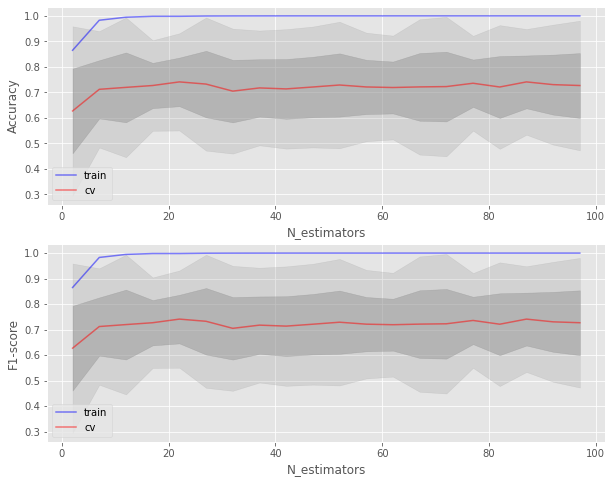

In [312]:
plot_randoForest_n_estimators(n_estimators, X_train, y_train)

###### The most easier way

In [319]:
from sklearn.model_selection import (learning_curve, validation_curve)

In [326]:
train_scores, valid_scores = validation_curve(BaggingClassifier(base_estimator=best_dt), data, target, param_name="n_estimators",
                                              param_range=n_estimators, cv=5)

Text(0.5, 0, 'N_estimators')

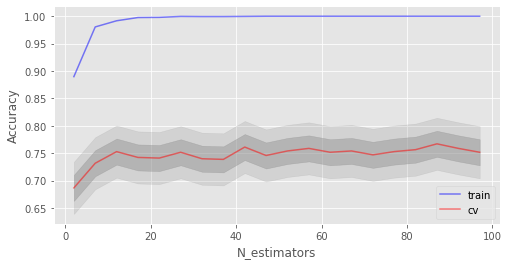

In [332]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n_estimators, train_scores.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(n_estimators, valid_scores.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(n_estimators, valid_scores.mean(axis=1) - valid_scores.std(), valid_scores.mean(axis=1) + valid_scores.std(), color='#888888', alpha=0.4)
ax.fill_between(n_estimators, valid_scores.mean(axis=1) - 2*valid_scores.std(), valid_scores.mean(axis=1) + 2*valid_scores.std(), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

In [330]:
best_cv_acc = [max(valid_scores.mean(axis=1))*100, n_estimators[np.argmax(valid_scores.mean(axis=1))]]
best_cv_acc

[76.71493212669684, 87]

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [339]:
# YOUR CODE HERE
train_sizes, train_scores, valid_scores = learning_curve(RandomForestClassifier(), data, target, train_sizes=[range(10, 110, 10)], cv=10)

Text(0.5, 1.0, 'Random Forest')

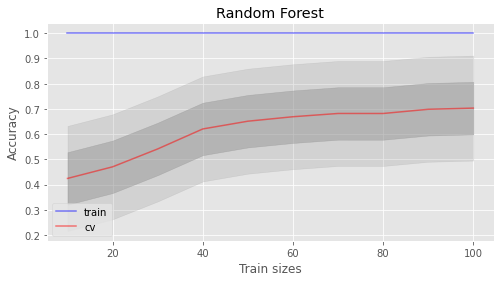

In [342]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(train_sizes, train_scores.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(train_sizes, valid_scores.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(train_sizes, valid_scores.mean(axis=1) - valid_scores.std(), valid_scores.mean(axis=1) + valid_scores.std(), color='#888888', alpha=0.4)
ax.fill_between(train_sizes, valid_scores.mean(axis=1) - 2*valid_scores.std(), valid_scores.mean(axis=1) + 2*valid_scores.std(), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Train sizes")
plt.title('Random Forest')

In [343]:
train_sizes, train_scores, valid_scores = learning_curve(best_lg, data, target, train_sizes=[range(10, 110, 10)], cv=10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(train_sizes, train_scores.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(train_sizes, valid_scores.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(train_sizes, valid_scores.mean(axis=1) - valid_scores.std(), valid_scores.mean(axis=1) + valid_scores.std(), color='#888888', alpha=0.4)
ax.fill_between(train_sizes, valid_scores.mean(axis=1) - 2*valid_scores.std(), valid_scores.mean(axis=1) + 2*valid_scores.std(), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Train sizes")
plt.title('LogReg')

Text(0.5, 1.0, 'LogReg')

So model based on Decision trees from the start remember train data, otherwise logreg with its grow become harder to classify the truth.

With the grow of training size the accuracy grow too, because its easier to folow data